# Imports necessários

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Implementação dos métodos

In [4]:
def sistema_aumentado(x, y, dim):
    m = len(x)

    A = np.empty((dim, dim))

    b = np.empty((dim))

    soma = []

    # Somatórios da matriz A
    for i in range(0, dim + 2):
        aux = 0

        for k in range(0, m):
            aux = aux + x[k] ** i

        soma.append(aux)

    # Preenchimento da matriz A
    for i in range(0, dim):
        for j in range(i, dim):
            A[i, j] = soma[i + j]

            if i != j:
                A[j, i] = A[i, j]

    b = []
    # Preencchimento do vetor b
    for i in range(0, dim):
        aux = 0

        for k in range(0, m):
            aux = aux + y[k] * (x[k] ** (i))

        b.append(aux)

    return A, b

# Letra A

## Resolvendo sistema linear

In [5]:
y = [
    3980,
    2200,
    1850,
    6100,
    2100,
    1700,
    2000,
    4200,
    2440,
    3300,
    2300,
    6000,
    1190,
    1960,
    2760,
    4330,
    6960,
    4160,
    1990,
    2860,
    1920,
    2160,
]

x = [
    0.59,
    0.80,
    0.95,
    0.45,
    0.79,
    0.99,
    0.90,
    0.65,
    0.79,
    0.69,
    0.79,
    0.49,
    1.09,
    0.95,
    0.79,
    0.65,
    0.45,
    0.60,
    0.89,
    0.79,
    0.99,
    0.85,
]

dim = 2  # Dois coeficientes (Uma reta)

A, b = sistema_aumentado(x, y, dim)

print("A = \n", A)

print("\n b = ", b)

# Coeficientes

coef = np.linalg.solve(A, b)

print("\n coef = ", coef)

A = 
 [[22.     16.93  ]
 [16.93   13.7127]]

 b = 
 [68460.0, 46993.600000000006]

 coef =  [ 9510.09957156 -8314.36447574]


## Gerando Gráfico da reta

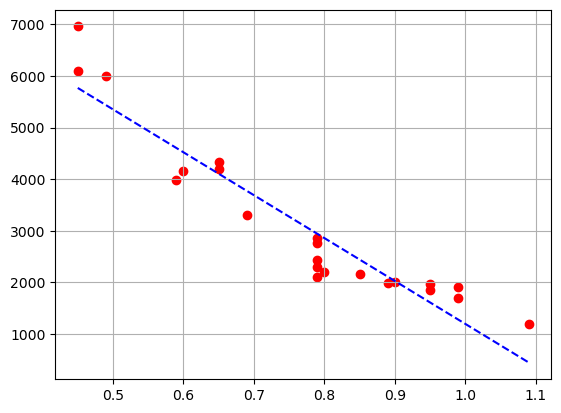

 
-8314 x + 9510


In [9]:
# Plot dos pontos de dados em vermelho
plt.scatter(x, y, color="r")

# Criar uma série de dados ao longo do intervalo dos valores de x
data = np.linspace(min(x), max(x), num=len(x))

# Copiar e inverter a ordem dos coeficientes
c = coef[::-1].copy()

# Criar uma função polinomial g com os coeficientes encontrados
g = np.poly1d(c)

# Plot da reta de ajuste em azul tracejado
plt.plot(data, g(data), "b--")

# Configurar a grade no gráfico
plt.grid()

# Mostrar o gráfico
plt.show()

# Imprimir a função polinomial g
print(g)

## Calculando RMSE

In [13]:
modeled = []

for i in range(len(x)):
    modeled.append(coef[1] * x[i] + coef[0])

RSE = ((np.array(y) - np.array(modeled)) ** 2) ** 0.5

RMSE = np.mean(RSE)

print("RMSE = ", RMSE)

RMSE =  436.09419714431533


# Letra B

In [16]:
x = sp.Symbol("x")
L = (coef[1] * x + coef[0]) * (x - 0.25)

L_derivada = sp.diff(L, x)

ponto_critico = sp.solve(L_derivada, x)

max_valor = max([L.subs(x, cp) for cp in ponto_critico])

print(
    "O lucro máximo é de {:.2f} e ocorre quando o preço de venda é de {:.2f}".format(
        max_valor, ponto_critico[0]
    )
)

O lucro máximo é de 1660.60 e ocorre quando o preço de venda é de 0.70
